# NYC Apartment Search

- Lorena Lu & Jessie Li

## Setup

In [4]:
# All import statements needed for the project, for example:

import json
import pathlib
import urllib.parse
import pandas as pd
import os
import requests
import csv
import seaborn as sns

import geoalchemy2 as gdb
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import requests
import shapely
import sqlalchemy as db
import sqlalchemy
from shapely.geometry import Point

from sqlalchemy.orm import declarative_base
from shapely import wkt

import warnings
warnings.filterwarnings("ignore")

## Part 1: Data Preprocessing

### 1.1 NYC-311 Data

#### 1.1.1 Downloading 311 Data by Years

In [37]:
def download_311_data_csv_by_year(url, token, start_date, end_date, data_directory="data", year=None, force=False):
    """
    Download 311 data in CSV format for a specific year.

    Args:
        url (str): The base URL for the 311 data API.
        token (str): The application token for accessing the API.
        start_date (str): The start date for the data query.
        end_date (str): The end date for the data query.
        data_directory (str, optional): The directory to store downloaded data. Default is "data".
        year (int, optional): The year for which to download data. Default is None.
        force (bool, optional): If True, overwrite existing data. Default is False.

    Returns:
        None
    """
    # Create the data directory if it doesn't exist
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)

    offset = 0
    limit = 50000000

    # Specify the output CSV file path
    file_path = os.path.join(data_directory, f"311data_{year}.csv")

    while True:
        # Construct the URL with $limit and $offset
        query = f"$$app_token={token}&$where=created_date between '{start_date}' and '{end_date}'&$limit={limit}&$offset={offset}"
        full_url = f"{url}?{query}"

        # Make the request
        response = requests.get(full_url)

        # Check if the request was successful
        if response.status_code == 200:
            # Append the data to the CSV file in append binary mode ('ab')
            with open(file_path, 'ab') as f:
                f.write(response.content)

            # Update offset
            offset += limit

            # Check if there are more records
            if len(response.content) < limit:
                break
        else:
            print(f"Error downloading records. Status code: {response.status_code}")
            break

In [ ]:
# Download 311data for 2015
url = "https://data.cityofnewyork.us/resource/erm2-nwe9.csv"
token = "PF3Dc6QpC4NUPwTOUR7y8BDYM"
start_date = '2015-01-01T00:00:00.000'
end_date = '2015-12-31T23:59:59.999'
year = 2015

download_311_data_csv_by_year(url, token, start_date, end_date, year = year)

In [ ]:
# Download 311data for 2016
url = "https://data.cityofnewyork.us/resource/erm2-nwe9.csv"
token = "PF3Dc6QpC4NUPwTOUR7y8BDYM"
start_date = '2016-01-01T00:00:00.000'
end_date = '2016-12-31T23:59:59.999'
year = 2016

download_311_data_csv_by_year(url, token, start_date, end_date, year = year)

In [ ]:
# Download 311data for 2017
url = "https://data.cityofnewyork.us/resource/erm2-nwe9.csv"
token = "PF3Dc6QpC4NUPwTOUR7y8BDYM"
start_date = '2017-01-01T00:00:00.000'
end_date = '2017-12-31T23:59:59.999'
year = 2017

download_311_data_csv_by_year(url, token, start_date, end_date, year = year)

In [ ]:
# Download 311data for 2018
url = "https://data.cityofnewyork.us/resource/erm2-nwe9.csv"
token = "PF3Dc6QpC4NUPwTOUR7y8BDYM"
start_date = '2018-01-01T00:00:00.000'
end_date = '2018-12-31T23:59:59.999'
year = 2018

download_311_data_csv_by_year(url, token, start_date, end_date, year = year)

In [ ]:
# Download 311data for 2019
url = "https://data.cityofnewyork.us/resource/erm2-nwe9.csv"
token = "PF3Dc6QpC4NUPwTOUR7y8BDYM"
start_date = '2019-01-01T00:00:00.000'
end_date = '2019-12-31T23:59:59.999'
year = 2019

download_311_data_csv_by_year(url, token, start_date, end_date, year = year)

In [ ]:
# Download 311data for 2020
url = "https://data.cityofnewyork.us/resource/erm2-nwe9.csv"
token = "PF3Dc6QpC4NUPwTOUR7y8BDYM"
start_date = '2020-01-01T00:00:00.000'
end_date = '2020-12-31T23:59:59.999'
year = 2020

download_311_data_csv_by_year(url, token, start_date, end_date, year = year)

In [ ]:
# Download 311data for 2021
url = "https://data.cityofnewyork.us/resource/erm2-nwe9.csv"
token = "PF3Dc6QpC4NUPwTOUR7y8BDYM"
start_date = '2021-01-01T00:00:00.000'
end_date = '2021-12-31T23:59:59.999'
year = 2021

download_311_data_csv_by_year(url, token, start_date, end_date, year = year)

In [ ]:
# Download 311data for 2022
url = "https://data.cityofnewyork.us/resource/erm2-nwe9.csv"
token = "PF3Dc6QpC4NUPwTOUR7y8BDYM"
start_date = '2022-01-01T00:00:00.000'
end_date = '2022-12-31T23:59:59.999'
year = 2022

download_311_data_csv_by_year(url, token, start_date, end_date, year = year)

In [ ]:
# Download 311data for 2023
url = "https://data.cityofnewyork.us/resource/erm2-nwe9.csv"
token = "PF3Dc6QpC4NUPwTOUR7y8BDYM"
start_date = '2023-01-01T00:00:00.000'
end_date = '2023-09-30T23:59:59.999'
year = 2023

download_311_data_csv_by_year(url, token, start_date, end_date, year = year)

In [38]:
data2015 = pd.read_csv("/Users/lyt/Documents/GitHub/final_project/data/311data_2015.csv")

In [39]:
data2016 = pd.read_csv("/Users/lyt/Documents/GitHub/final_project/data/311data_2016.csv")

In [40]:
data2017 = pd.read_csv("/Users/lyt/Documents/GitHub/final_project/data/311data_2017.csv")

In [41]:
data2018 = pd.read_csv("/Users/lyt/Documents/GitHub/final_project/data/311data_2018.csv")

In [42]:
data2019 = pd.read_csv("/Users/lyt/Documents/GitHub/final_project/data/311data_2019.csv")

In [43]:
data2020 = pd.read_csv("/Users/lyt/Documents/GitHub/final_project/data/311data_2020.csv")

In [44]:
data2021 = pd.read_csv("/Users/lyt/Documents/GitHub/final_project/data/311data_2021.csv")

In [45]:
data2022 = pd.read_csv("/Users/lyt/Documents/GitHub/final_project/data/311data_2022.csv")

In [46]:
data2023 = pd.read_csv("/Users/lyt/Documents/GitHub/final_project/data/311data_2023.csv")

#### 1.1.2 Cleaning and Normalizing 311 Data by Years

In [47]:
# Select the columns we need for 2015
selected_311_2015 = data2015[['incident_zip', "created_date", "latitude", "longitude", "complaint_type"]]

# Drop NA
df_2015 = selected_311_2015.dropna()

# Normalize Dataset
# Rename columns
data_2015 = df_2015.rename(columns={'incident_zip': 'zipcode', "created_date": "date"})

# Drop the last row
data_2015 = data_2015.drop(data_2015.index[-1])

# Convert data types
data_2015['longitude'] = pd.to_numeric(data_2015['longitude'], errors='coerce')
data_2015['latitude'] = pd.to_numeric(data_2015['latitude'], errors='coerce')
data_2015['zipcode'] = data_2015['zipcode'].astype(str)
data_2015['complaint_type'] = data_2015['complaint_type'].astype(str)
data_2015['date'] = pd.to_datetime(data_2015['date'], errors='coerce')

# Normalize SRID of geometry
geometry = gpd.points_from_xy(data_2015['longitude'], data_2015['latitude'])
gdf_2015 = gpd.GeoDataFrame(data_2015, geometry=geometry)

In [48]:
# Select the columns we need 2016
selected_311_2016 = data2016[['incident_zip', "created_date","latitude", "longitude","complaint_type"]]

# Drop NA
df_2016 = selected_311_2016.dropna()

# Normalize Dataset
# Rename column
data_2016 = df_2016.rename(columns={'incident_zip': 'zipcode', "created_date": "date"})

# Drop the last row
data_2016 = data_2016.drop(data_2016.index[-1])

# Convert data types
data_2016['longitude'] = pd.to_numeric(data_2016['longitude'], errors='coerce')
data_2016['latitude'] = pd.to_numeric(data_2016['latitude'], errors='coerce')
data_2016['zipcode'] = data_2016['zipcode'].astype(str)
data_2016['complaint_type'] = data_2016['complaint_type'].astype(str)
data_2016['date'] = pd.to_datetime(data_2016['date'], errors='coerce')

# Normlize SRID of geometry
geometry = gpd.points_from_xy(data_2016['longitude'], data_2016['latitude'])
gdf_2016 = gpd.GeoDataFrame(data_2016, geometry=geometry)

In [49]:
# Select the columns we need 2017
selected_311_2017 = data2017[['incident_zip', "created_date","latitude", "longitude","complaint_type"]]

# Drop NA
df_2017 = selected_311_2017.dropna()

# Normalize Dataset
# Rename column
data_2017 = df_2017.rename(columns={'incident_zip': 'zipcode', "created_date": "date"})

# Drop the last row
data_2017 = data_2017.drop(data_2017.index[-1])

# Convert Type
data_2017['longitude'] = pd.to_numeric(data_2017['longitude'], errors='coerce')
data_2017['latitude'] = pd.to_numeric(data_2017['latitude'], errors='coerce')
data_2017['zipcode'] = data_2017['zipcode'].astype(str)
data_2017['complaint_type'] = data_2017['complaint_type'].astype(str)
data_2017['date'] = pd.to_datetime(data_2017['date'], errors='coerce')

# Normlize SRID of geometry
geometry = gpd.points_from_xy(data_2017['longitude'], data_2017['latitude'])
gdf_2017 = gpd.GeoDataFrame(data_2017, geometry=geometry)

In [50]:
# Select the columns we need 2018
selected_311_2018 = data2018[['incident_zip', "created_date","latitude", "longitude","complaint_type"]]

# Drop NA
df_2018 = selected_311_2018.dropna()

# Normalize Dataset
# Rename column
data_2018 = df_2018.rename(columns={'incident_zip': 'zipcode', "created_date": "date"})

# Drop the last row
data_2018 = data_2018.drop(data_2018.index[-1])

# Convert Type
data_2018['longitude'] = pd.to_numeric(data_2018['longitude'], errors='coerce')
data_2018['latitude'] = pd.to_numeric(data_2018['latitude'], errors='coerce')
data_2018['zipcode'] = data_2018['zipcode'].astype(str)
data_2018['complaint_type'] = data_2018['complaint_type'].astype(str)
data_2018['date'] = pd.to_datetime(data_2018['date'], errors='coerce')

# Normlize SRID of geometry
geometry = gpd.points_from_xy(data_2018['longitude'], data_2018['latitude'])
gdf_2018 = gpd.GeoDataFrame(data_2018, geometry=geometry)

In [51]:
# Select the columns we need 2019
selected_311_2019 = data2019[['incident_zip', "created_date","latitude", "longitude","complaint_type"]]

# Drop NA
df_2019 = selected_311_2019.dropna()

# Normalize Dataset
# Rename column
data_2019 = df_2019.rename(columns={'incident_zip': 'zipcode', "created_date": "date"})

# Drop the last row
data_2019 = data_2019.drop(data_2019.index[-1])

# Convert Type
data_2019['longitude'] = pd.to_numeric(data_2019['longitude'], errors='coerce')
data_2019['latitude'] = pd.to_numeric(data_2019['latitude'], errors='coerce')
data_2019['zipcode'] = data_2019['zipcode'].astype(str)
data_2019['complaint_type'] = data_2019['complaint_type'].astype(str)
data_2019['date'] = pd.to_datetime(data_2019['date'], errors='coerce')

# Normlize SRID of geometry
geometry = gpd.points_from_xy(data_2019['longitude'], data_2019['latitude'])
gdf_2019 = gpd.GeoDataFrame(data_2019, geometry=geometry)

In [52]:
# Select the columns we need 2020
selected_311_2020 = data2020[['incident_zip', "created_date","latitude", "longitude","complaint_type"]]

# Drop NA
df_2020 = selected_311_2020.dropna()

# Normalize Dataset
# Rename column
data_2020 = df_2020.rename(columns={'incident_zip': 'zipcode', "created_date": "date"})

# Drop the last row
data_2020 = data_2020.drop(data_2020.index[-1])

# Convert Type
data_2020['longitude'] = pd.to_numeric(data_2020['longitude'], errors='coerce')
data_2020['latitude'] = pd.to_numeric(data_2020['latitude'], errors='coerce')
data_2020['zipcode'] = data_2020['zipcode'].astype(str)
data_2020['complaint_type'] = data_2020['complaint_type'].astype(str)
data_2020['date'] = pd.to_datetime(data_2020['date'], errors='coerce')

# Normlize SRID of geometry
geometry = gpd.points_from_xy(data_2020['longitude'], data_2020['latitude'])
gdf_2020 = gpd.GeoDataFrame(data_2020, geometry=geometry)

In [53]:
# Select the columns we need 2021
selected_311_2021 = data2021[['incident_zip', "created_date","latitude", "longitude","complaint_type"]]

# Drop NA
df_2021 = selected_311_2021.dropna()

# Normalize Dataset
# Rename column
data_2021 = df_2021.rename(columns={'incident_zip': 'zipcode', "created_date": "date"})

# Drop the last row
data_2021 = data_2021.drop(data_2021.index[-1])

# Convert Type
data_2021['longitude'] = pd.to_numeric(data_2021['longitude'], errors='coerce')
data_2021['latitude'] = pd.to_numeric(data_2021['latitude'], errors='coerce')
data_2021['zipcode'] = data_2021['zipcode'].astype(str)
data_2021['complaint_type'] = data_2021['complaint_type'].astype(str)
data_2021['date'] = pd.to_datetime(data_2021['date'], errors='coerce')

# Normlize SRID of geometry
geometry = gpd.points_from_xy(data_2021['longitude'], data_2021['latitude'])
gdf_2021 = gpd.GeoDataFrame(data_2021, geometry=geometry)

In [54]:
# Select the columns we need 2022
selected_311_2022 = data2022[['incident_zip', "created_date","latitude", "longitude","complaint_type"]]

# Drop NA
df_2022 = selected_311_2022.dropna()

# Normalize Dataset
# Rename column
data_2022 = df_2022.rename(columns={'incident_zip': 'zipcode', "created_date": "date"})

# Drop the last row
data_2022 = data_2022.drop(data_2022.index[-1])

# Convert Type
data_2022['longitude'] = pd.to_numeric(data_2022['longitude'], errors='coerce')
data_2022['latitude'] = pd.to_numeric(data_2022['latitude'], errors='coerce')
data_2022['zipcode'] = data_2022['zipcode'].astype(str)
data_2022['complaint_type'] = data_2022['complaint_type'].astype(str)
data_2022['date'] = pd.to_datetime(data_2022['date'], errors='coerce')

# Normlize SRID of geometry
geometry = gpd.points_from_xy(data_2022['longitude'], data_2022['latitude'])
gdf_2022 = gpd.GeoDataFrame(data_2022, geometry=geometry)

In [55]:
# Select the columns we need 2023
selected_311_2023 = data2023[['incident_zip', "created_date","latitude", "longitude","complaint_type"]]

# Drop NA
df_2023 = selected_311_2023.dropna()

# Normalize Dataset
# Rename column
data_2023 = df_2023.rename(columns={'incident_zip': 'zipcode', "created_date": "date"})

# Drop the last row
data_2023 = data_2023.drop(data_2023.index[-1])

# Convert Type
data_2023['longitude'] = pd.to_numeric(data_2023['longitude'], errors='coerce')
data_2023['latitude'] = pd.to_numeric(data_2023['latitude'], errors='coerce')
data_2023['zipcode'] = data_2023['zipcode'].astype(str)
data_2023['complaint_type'] = data_2023['complaint_type'].astype(str)
data_2023['date'] = pd.to_datetime(data_2023['date'], errors='coerce')

# Normlize SRID of geometry
geometry = gpd.points_from_xy(data_2023['longitude'], data_2023['latitude'])
gdf_2023 = gpd.GeoDataFrame(data_2023, geometry=geometry)

#### 1.1.3 Merging 311 Datasets

In [56]:
geo_df_list = [gdf_2015, gdf_2016, gdf_2017, gdf_2018, gdf_2019, gdf_2020, gdf_2021, gdf_2022, gdf_2023]

In [57]:
# Merge all the years to one GeoDataFrame
merged_311 = gpd.GeoDataFrame(pd.concat(geo_df_list, ignore_index=True), crs=geo_df_list[0].crs)

In [58]:
# Drop duplicated
data_311 = merged_311.drop_duplicates()

### 1.2 NYC-Tree data

#### 1.2.1 Downloading Data

In [ ]:
def download_tree_data(url, token, force=False):
    """
    Download tree data from a given URL using the provided token.

    Parameters:
    - url (str): The URL to download data from.
    - token (str): The app token for accessing the data.
    - force (bool): If True, force the download even if the file already exists.

    Returns:
    - pathlib.Path: The path to the downloaded file.
    """
    parsed_url = urllib.parse.urlparse(url)
    url_path = parsed_url.path.strip("/")
    
    filename = pathlib.Path("data") / url_path

    # Create directories if they don't exist
    filename.parent.mkdir(parents=True, exist_ok=True)
    
    if force or not filename.exists():
        print(f"Downloading {url} to {filename}...")
        
        # Set the initial offset
        offset = 0
        limit = 5000000
        
        while True:
            # Include the $limit and $offset parameters in the URL
            query = f"$limit={limit}&$offset={offset}"
            full_url = f"{url}?$$app_token={token}&{query}"

            # Make the request
            response = requests.get(full_url)
            
            # Print debugging information
            print(f"Response status code: {response.status_code}")
            print(f"Response content: {response.text}")

            # Check if the response is not empty
            if response.text:
                try:
                    # Attempt to parse JSON
                    json_data = response.json()
                    with open(filename, "a") as f:  # Append to the file instead of overwriting
                        json.dump(json_data, f)
                    print(f"Downloaded {len(json_data)} records from {url}.")
                    
                    # Check if there are more records
                    if len(json_data) < limit:
                        break
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON from {url}: {e}")
            else:
                print(f"Empty response received from {url}.")

            # Update the offset for the next page
            offset += limit

    else:
        print(f"Reading from {filename}...")

    return filename

# Set the URL and token
url = "https://data.cityofnewyork.us/resource/5rq2-4hqu.geojson"
token = "PF3Dc6QpC4NUPwTOUR7y8BDYM"

geojson_file_tree = download_tree_data(url, token)

In [24]:
data_tree = gpd.read_file("/Users/lyt/Documents/GitHub/final_project/data/resource/5rq2-4hqu.geojson")

#### 1.2.2 Cleaning and Normalizing Data

In [25]:
# Select the columns we need
selected_tree = data_tree[['zipcode', "spc_common","latitude", "longitude","health", "status", "geometry"]]

# Drop NA
df_tree = selected_tree.dropna()

# Normalize Dataset
# Rename column
data_tree = df_tree.rename(columns={'spc_common': 'species'})

# Normalize SRID of geometry
data_tree = data_tree.set_geometry('geometry').to_crs('EPSG:4326')
data_tree['geometry'] = data_tree.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

### 1.3 Zipcode data

#### 1.3.1 Reading data

In [26]:
data_zipcode = gpd.read_file("/Users/lyt/Documents/GitHub/final_project/data/nyc_zipcodes/nyc_zipcodes.shp")

#### 1.3.2 Cleaning and Normalizing Data

In [27]:
# Select columns we need
selected_zipcode = data_zipcode[["ZIPCODE", "geometry"]]

# Drop NA
data_zipcode = selected_zipcode.dropna()

# Convert columns to consistent type
data_zipcode.columns = data_zipcode.columns.str.lower()
data_zipcode = data_zipcode.set_geometry('geometry').to_crs('EPSG:4326')

### 1.4 Zillow data

#### 1.4.1 Reading data

In [28]:
data_zillow = pd.read_csv("/Users/lyt/Documents/GitHub/final_project/data/zillow_rent_data.csv")

#### 1.4.2 Cleaning and Normalizing Data

In [29]:
# Select only NYC zillow data
selected_zillow = data_zillow[data_zillow["City"] == "New York"]

# Drop the columns we do not need
drop_column = ["RegionID", "SizeRank", "RegionType", "StateName", "State", "City", "Metro", "CountyName"]
data_zillow = selected_zillow.drop(columns = drop_column)

# Rename column
data_zillow = data_zillow.rename(columns={'RegionName': 'zipcode'})

# Fill in NA with 0
data_zillow = data_zillow.fillna(0)

## 1.5 Info

In [30]:
data_311.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 22807182 entries, 0 to 27310416
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   zipcode         object        
 1   date            datetime64[ns]
 2   latitude        float64       
 3   longitude       float64       
 4   complaint_type  object        
 5   geometry        geometry      
dtypes: datetime64[ns](1), float64(2), geometry(1), object(2)
memory usage: 1.2+ GB


In [31]:
data_311.head()

,zipcode,date,latitude,longitude,complaint_type,geometry
0,10034,2015-12-31 23:59:45,40.865682,-73.923501,Noise - Street/Sidewalk,POINT (-73.92350 40.86568)
1,11105,2015-12-31 23:59:44,40.775945,-73.915094,Blocked Driveway,POINT (-73.91509 40.77595)
2,10302,2015-12-31 23:59:32,40.632882,-74.132033,Noise - Residential,POINT (-74.13203 40.63288)
3,10458,2015-12-31 23:59:29,40.870325,-73.888525,Blocked Driveway,POINT (-73.88852 40.87032)
4,10002,2015-12-31 23:59:19,40.710478,-73.986571,Noise - Residential,POINT (-73.98657 40.71048)


In [32]:
data_tree.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 652167 entries, 0 to 683787
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   zipcode    652167 non-null  object  
 1   species    652167 non-null  object  
 2   latitude   652167 non-null  object  
 3   longitude  652167 non-null  object  
 4   health     652167 non-null  object  
 5   status     652167 non-null  object  
 6   geometry   652167 non-null  geometry
dtypes: geometry(1), object(6)
memory usage: 39.8+ MB


In [33]:
data_tree.head()

,zipcode,species,latitude,longitude,health,status,geometry
0,11375,red maple,40.72309177,-73.84421522,Fair,Alive,POINT (-73.84422 40.72309)
1,11357,pin oak,40.79411067,-73.81867946,Fair,Alive,POINT (-73.81868 40.79411)
2,11211,honeylocust,40.71758074,-73.9366077,Good,Alive,POINT (-73.93661 40.71758)
3,11211,honeylocust,40.71353749,-73.93445616,Good,Alive,POINT (-73.93446 40.71354)
4,11215,American linden,40.66677776,-73.97597938,Good,Alive,POINT (-73.97598 40.66678)


In [34]:
data_zipcode.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   zipcode   263 non-null    object  
 1   geometry  263 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.2+ KB


In [35]:
data_zipcode.head()

,zipcode,geometry
0,11436,"POLYGON ((-73.80585 40.68291, -73.80569 40.682..."
1,11213,"POLYGON ((-73.93740 40.67973, -73.93487 40.679..."
2,11212,"POLYGON ((-73.90294 40.67084, -73.90223 40.668..."
3,11225,"POLYGON ((-73.95797 40.67066, -73.95576 40.670..."
4,11218,"POLYGON ((-73.97208 40.65060, -73.97192 40.650..."


In [36]:
data_zillow.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 4 to 6721
Columns: 106 entries, zipcode to 2023-09-30
dtypes: float64(105), int64(1)
memory usage: 121.2 KB


In [37]:
data_zillow.head()

,zipcode,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
4,11385,0.0,2087.527084,0.0,2149.924252,2166.263698,2148.992886,2190.098591,2264.966715,2297.900917,...,2935.808220,2895.699421,2873.209025,2881.906361,2913.546218,2963.964134,3005.735342,3034.413822,3064.476503,3079.585783
6,11208,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2508.670432,2588.030194,2613.790654,2585.561351,2633.200754,2672.038493,2806.918757,2765.224364,2737.547470,2728.733333
12,11236,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2285.460026,2362.500000
13,10467,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2145.642295,2155.617718,2172.346611,2160.962748,2110.533203,2180.323655,2276.372290,2334.204728,2353.686402,2423.888889
14,11373,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2199.459063,2255.604528,2262.101623,2271.514956,2250.182334,2231.959479,2257.413993,2247.592851,2302.557354,2292.994444


## Part 2: Storing Data

In [5]:
# Create Database
!createdb finalproject_4

createdb: error: database creation failed: ERROR:  database "finalproject_4" already exists


## 2.1 Creating Tables
- Using SQL Achelmy

In [7]:
from sqlalchemy import MetaData

engine = db.create_engine("postgresql://localhost/finalproject_4")

In [8]:
from geoalchemy2 import Geometry

In [9]:
import sqlalchemy
from sqlalchemy import create_engine, Column, Integer, String, Float, DateTime
from sqlalchemy.ext.declarative import declarative_base
from geoalchemy2 import Geometry
from sqlalchemy import MetaData

Base = declarative_base()

class Zipcode(Base):
    """Model for the 'zipcodes' table."""

    __tablename__ = "zipcodes"

    id = Column(Integer, primary_key=True)
    zipcode = Column(String)
    geometry = Column(Geometry('POLYGON', srid=4326))

class NYC311(Base):
    """Model for the 'nyc_311' table."""

    __tablename__ = "nyc_311"

    id = Column(Integer, primary_key=True)
    zipcode = Column(String)
    date = Column(DateTime)
    latitude = Column(Float)
    longitude = Column(Float)
    complaint_type = Column(String)
    geometry = Column(Geometry('POINT', srid=4326))

class NYCTree(Base):
    """Model for the 'nyc_tree' table."""

    __tablename__ = "nyc_tree"

    id = Column(Integer, primary_key=True)
    zipcode = Column(String)
    species = Column(String)
    latitude = Column(Float)
    longitude = Column(Float)
    status = Column(String)
    health = Column(String)
    geometry = Column(Geometry('POINT', srid=4326))

class Zillow(Base):
    """Model for the 'zillow' table."""
    __tablename__ = "zillow"

    id = Column(Integer, primary_key=True)
    zipcode = Column(String)
    
    jan_2015 = Column(Float, name="2015-01-31")
    feb_2015 = Column(Float, name="2015-02-28")
    mar_2015 = Column(Float, name="2015-03-31")
    apr_2015 = Column(Float, name="2015-04-30")
    may_2015 = Column(Float, name="2015-05-31")
    jun_2015 = Column(Float, name="2015-06-30")
    jul_2015 = Column(Float, name="2015-07-31")
    aug_2015 = Column(Float, name="2015-08-31")
    sep_2015 = Column(Float, name="2015-09-30")
    oct_2015 = Column(Float, name="2015-10-31")
    nov_2015 = Column(Float, name="2015-11-30")
    dec_2015 = Column(Float, name="2015-12-31")
    jan_2016 = Column(Float, name="2016-01-31")
    feb_2016 = Column(Float, name="2016-02-29")
    mar_2016 = Column(Float, name="2016-03-31")
    apr_2016 = Column(Float, name="2016-04-30")
    may_2016 = Column(Float, name="2016-05-31")
    jun_2016 = Column(Float, name="2016-06-30")
    jul_2016 = Column(Float, name="2016-07-31")
    aug_2016 = Column(Float, name="2016-08-31")
    sep_2016 = Column(Float, name="2016-09-30")
    oct_2016 = Column(Float, name="2016-10-31")
    nov_2016 = Column(Float, name="2016-11-30")
    dec_2016 = Column(Float, name="2016-12-31")
    jan_2017 = Column(Float, name="2017-01-31")
    feb_2017 = Column(Float, name="2017-02-28")
    mar_2017 = Column(Float, name="2017-03-31")
    apr_2017 = Column(Float, name="2017-04-30")
    may_2017 = Column(Float, name="2017-05-31")
    jun_2017 = Column(Float, name="2017-06-30")
    jul_2017 = Column(Float, name="2017-07-31")
    aug_2017 = Column(Float, name="2017-08-31")
    sep_2017 = Column(Float, name="2017-09-30")
    oct_2017 = Column(Float, name="2017-10-31")
    nov_2017 = Column(Float, name="2017-11-30")
    dec_2017 = Column(Float, name="2017-12-31")
    jan_2018 = Column(Float, name="2018-01-31")
    feb_2018 = Column(Float, name="2018-02-28")
    mar_2018 = Column(Float, name="2018-03-31")
    apr_2018 = Column(Float, name="2018-04-30")
    may_2018 = Column(Float, name="2018-05-31")
    jun_2018 = Column(Float, name="2018-06-30")
    jul_2018 = Column(Float, name="2018-07-31")
    aug_2018 = Column(Float, name="2018-08-31")
    sep_2018 = Column(Float, name="2018-09-30")
    oct_2018 = Column(Float, name="2018-10-31")
    nov_2018 = Column(Float, name="2018-11-30")
    dec_2018 = Column(Float, name="2018-12-31")
    jan_2019 = Column(Float, name="2019-01-31")
    feb_2019 = Column(Float, name="2019-02-28")
    mar_2019 = Column(Float, name="2019-03-31")
    apr_2019 = Column(Float, name="2019-04-30")
    may_2019 = Column(Float, name="2019-05-31")
    jun_2019 = Column(Float, name="2019-06-30")
    jul_2019 = Column(Float, name="2019-07-31")
    aug_2019 = Column(Float, name="2019-08-31")
    sep_2019 = Column(Float, name="2019-09-30")
    oct_2019 = Column(Float, name="2019-10-31")
    nov_2019 = Column(Float, name="2019-11-30")
    dec_2019 = Column(Float, name="2019-12-31")
    jan_2020 = Column(Float, name="2020-01-31")
    feb_2020 = Column(Float, name="2020-02-29")
    mar_2020 = Column(Float, name="2020-03-31")
    apr_2020 = Column(Float, name="2020-04-30")
    may_2020 = Column(Float, name="2020-05-31")
    jun_2020 = Column(Float, name="2020-06-30")
    jul_2020 = Column(Float, name="2020-07-31")
    aug_2020 = Column(Float, name="2020-08-31")
    sep_2020 = Column(Float, name="2020-09-30")
    oct_2020 = Column(Float, name="2020-10-31")
    nov_2020 = Column(Float, name="2020-11-30")
    dec_2020 = Column(Float, name="2020-12-31")
    jan_2021 = Column(Float, name="2021-01-31")
    feb_2021 = Column(Float, name="2021-02-28")
    mar_2021 = Column(Float, name="2021-03-31")
    apr_2021 = Column(Float, name="2021-04-30")
    may_2021 = Column(Float, name="2021-05-31")
    jun_2021 = Column(Float, name="2021-06-30")
    jul_2021 = Column(Float, name="2021-07-31")
    aug_2021 = Column(Float, name="2021-08-31")
    sep_2021 = Column(Float, name="2021-09-30")
    oct_2021 = Column(Float, name="2021-10-31")
    nov_2021 = Column(Float, name="2021-11-30")
    dec_2021 = Column(Float, name="2021-12-31")
    jan_2022 = Column(Float, name="2022-01-31")
    feb_2022 = Column(Float, name="2022-02-28")
    mar_2022 = Column(Float, name="2022-03-31")
    apr_2022 = Column(Float, name="2022-04-30")
    may_2022 = Column(Float, name="2022-05-31")
    jun_2022 = Column(Float, name="2022-06-30")
    jul_2022 = Column(Float, name="2022-07-31")
    aug_2022 = Column(Float, name="2022-08-31")
    sep_2022 = Column(Float, name="2022-09-30")
    oct_2022 = Column(Float, name="2022-10-31")
    nov_2022 = Column(Float, name="2022-11-30")
    dec_2022 = Column(Float, name="2022-12-31")
    jan_2023 = Column(Float, name="2023-01-31")
    feb_2023 = Column(Float, name="2023-02-28")
    mar_2023 = Column(Float, name="2023-03-31")
    apr_2023 = Column(Float, name="2023-04-30")
    may_2023 = Column(Float, name="2023-05-31")
    jun_2023 = Column(Float, name="2023-06-30")
    jul_2023 = Column(Float, name="2023-07-31")
    aug_2023 = Column(Float, name="2023-08-31")
    sep_2023 = Column(Float, name="2023-09-30")

# Define the database connection string
connection_string = "postgresql://localhost/finalproject_4"
engine = create_engine(connection_string)

# Create metadata and bind it to the engine
metadata = MetaData()
metadata.bind = engine

# Clear metadata to avoid redefinition issues
metadata.clear()

# Create tables
Base.metadata.create_all(engine)

# Save the schema to a file
with open('schema.sql', 'w') as file:
    for table in metadata.sorted_tables:
        create_table_statement = str(table) + ";"
        file.write(f"{create_table_statement}\n\n")

In [10]:
from sqlalchemy.orm import sessionmaker

In [11]:
Session = sessionmaker(bind=engine)

# Create a session
session = Session()

## 2.2 Insert Data

### 2.2.1 Insert data_tree

In [12]:
from sqlalchemy.exc import IntegrityError
from geopandas import GeoSeries

In [13]:
from sqlalchemy import func

In [49]:
# Create a session
Session = sessionmaker(bind=engine)
session = Session()

try:
    # Iterate through the DataFrame and insert into the table
    for index, row in data_tree.iterrows():
        # Use ST_MakePoint to create a Point geometry
        point_geometry = f'POINT({row["longitude"]} {row["latitude"]})'
        nyc_tree_entry = NYCTree(
            zipcode=str(row['zipcode']),
            species=row['species'],
            latitude=row['latitude'],
            longitude=row['longitude'],
            health=row['health'],
            status=row['status'],
            geometry=func.ST_GeomFromEWKT(point_geometry)
        )
        session.add(nyc_tree_entry)

    # Commit the changes
    session.commit()

except Exception as e:
    # If there's an error, print the exception and rollback the transaction
    print(f"Error: {e}")
    session.rollback()

finally:
    # Close the session
    session.close()

### 2.2.2 Insert data zillow

In [50]:
# Convert the DataFrame to a list of dictionaries
data_zillow_records = data_zillow.to_dict(orient='records')

In [51]:
from sqlalchemy.exc import IntegrityError

In [52]:
for record in data_zillow_records:
    # Map dictionary keys to column names in Zillows class
    mapped_record = {
        'zipcode': record['zipcode'],
        'jan_2015': record['2015-01-31'],
        'feb_2015': record['2015-02-28'],
        'mar_2015': record['2015-03-31'],
        'apr_2015': record['2015-04-30'],
        'may_2015': record['2015-05-31'],
        'jun_2015': record['2015-06-30'],
        'jul_2015': record['2015-07-31'],
        'aug_2015': record['2015-08-31'],
        'sep_2015': record['2015-09-30'],
        'oct_2015': record['2015-10-31'],
        'nov_2015': record['2015-11-30'],
        'dec_2015': record['2015-12-31'],
        'jan_2016': record['2016-01-31'],
        'feb_2016': record['2016-02-29'],
        'mar_2016': record['2016-03-31'],
        'apr_2016': record['2016-04-30'],
        'may_2016': record['2016-05-31'],
        'jun_2016': record['2016-06-30'],
        'jul_2016': record['2016-07-31'],
        'aug_2016': record['2016-08-31'],
        'sep_2016': record['2016-09-30'],
        'oct_2016': record['2016-10-31'],
        'nov_2016': record['2016-11-30'],
        'dec_2016': record['2016-12-31'],
        'jan_2017': record['2017-01-31'],
        'feb_2017': record['2017-02-28'],
        'mar_2017': record['2017-03-31'],
        'apr_2017': record['2017-04-30'],
        'may_2017': record['2017-05-31'],
        'jun_2017': record['2017-06-30'],
        'jul_2017': record['2017-07-31'],
        'aug_2017': record['2017-08-31'],
        'sep_2017': record['2017-09-30'],
        'oct_2017': record['2017-10-31'],
        'nov_2017': record['2017-11-30'],
        'dec_2017': record['2017-12-31'],
        'jan_2018': record['2018-01-31'],
        'feb_2018': record['2018-02-28'],
        'mar_2018': record['2018-03-31'],
        'apr_2018': record['2018-04-30'],
        'may_2018': record['2018-05-31'],
        'jun_2018': record['2018-06-30'],
        'jul_2018': record['2018-07-31'],
        'aug_2018': record['2018-08-31'],
        'sep_2018': record['2018-09-30'],
        'oct_2018': record['2018-10-31'],
        'nov_2018': record['2018-11-30'],
        'dec_2018': record['2018-12-31'],
        'jan_2019': record['2019-01-31'],
        'feb_2019': record['2019-02-28'],
        'mar_2019': record['2019-03-31'],
        'apr_2019': record['2019-04-30'],
        'may_2019': record['2019-05-31'],
        'jun_2019': record['2019-06-30'],
        'jul_2019': record['2019-07-31'],
        'aug_2019': record['2019-08-31'],
        'sep_2019': record['2019-09-30'],
        'oct_2019': record['2019-10-31'],
        'nov_2019': record['2019-11-30'],
        'dec_2019': record['2019-12-31'],
        'jan_2020': record['2020-01-31'],
        'feb_2020': record['2020-02-29'],
        'mar_2020': record['2020-03-31'],
        'apr_2020': record['2020-04-30'],
        'may_2020': record['2020-05-31'],
        'jun_2020': record['2020-06-30'],
        'jul_2020': record['2020-07-31'],
        'aug_2020': record['2020-08-31'],
        'sep_2020': record['2020-09-30'],
        'oct_2020': record['2020-10-31'],
        'nov_2020': record['2020-11-30'],
        'dec_2020': record['2020-12-31'],
        'jan_2021': record['2021-01-31'],
        'feb_2021': record['2021-02-28'],
        'mar_2021': record['2021-03-31'],
        'apr_2021': record['2021-04-30'],
        'may_2021': record['2021-05-31'],
        'jun_2021': record['2021-06-30'],
        'jul_2021': record['2021-07-31'],
        'aug_2021': record['2021-08-31'],
        'sep_2021': record['2021-09-30'],
        'oct_2021': record['2021-10-31'],
        'nov_2021': record['2021-11-30'],
        'dec_2021': record['2021-12-31'],
        'jan_2022': record['2022-01-31'],
        'feb_2022': record['2022-02-28'],
        'mar_2022': record['2022-03-31'],
        'apr_2022': record['2022-04-30'],
        'may_2022': record['2022-05-31'],
        'jun_2022': record['2022-06-30'],
        'jul_2022': record['2022-07-31'],
        'aug_2022': record['2022-08-31'],
        'sep_2022': record['2022-09-30'],
        'oct_2022': record['2022-10-31'],
        'nov_2022': record['2022-11-30'],
        'dec_2022': record['2022-12-31'],
        'jan_2023': record['2023-01-31'],
        'feb_2023': record['2023-02-28'],
        'mar_2023': record['2023-03-31'],
        'apr_2023': record['2023-04-30'],
        'may_2023': record['2023-05-31'],
        'jun_2023': record['2023-06-30'],
        'jul_2023': record['2023-07-31'],
        'aug_2023': record['2023-08-31'],
        'sep_2023': record['2023-09-30'],
    }

    try:
        zillow_entry = Zillow(**mapped_record)
        session.add(zillow_entry)
        session.commit()
    except IntegrityError as e:
        print(f"IntegrityError: {e}")
        session.rollback()  # Rollback the transaction in case of an error

# Close the session
session.close()

### 2.2.3 Insert zipcode

In [53]:
data_zipcode = pd.DataFrame(data_zipcode)

In [54]:
# Create a session
Session = sessionmaker(bind=engine)
session = Session()

try:
    # Iterate through the GeoDataFrame and insert into the table
    for index, row in data_zipcode.iterrows():
        # Use ST_GeomFromEWKT to convert the geometry to EWKT format
        ewkt_geometry = f'SRID=4326;{row["geometry"]}'
        zipcode_entry = Zipcode(zipcode=row['zipcode'], geometry=func.ST_GeomFromEWKT(ewkt_geometry))
        session.add(zipcode_entry)

    # Commit the changes
    session.commit()

except Exception as e:
    # If there's an error, print the exception and rollback the transaction
    print(f"Error: {e}")
    session.rollback()

finally:
    # Close the session
    session.close()

### 2.2.4 Insert 311 data

In [55]:
# Convert geometry to WKT
data_311['geometry'] = data_311['geometry'].apply(lambda geom: geom.wkt if geom is not None else None)

In [56]:
# Write to SQL
data_311.to_sql('nyc_311', engine, if_exists='append', index=False)

182

## Part 3: Understanding the Data

In [15]:
def write_query_to_file(query, outfile):
    """
    Write an SQL query to a file.

    Parameters:
    - query (str): The SQL query to write to the file.
    - outfile (str): The name of the file to write the query.

    Returns:
    - None
    """
    with open(outfile, 'w') as file:
        file.write(query)

In [16]:
QUERY_DIR = pathlib.Path("queries")

In [17]:
# Make sure the QUERY_DIRECTORY exists
if not QUERY_DIR.exists():
    QUERY_DIR.mkdir()

### Query 1

In [18]:
query1_filename = QUERY_DIR / "query1.sql"

"""
Query 1: Retrieve the number of complaints per ZIP code within a specific date range.

Parameters:
    - date_start (str): Start date of the date range (format: 'YYYY-MM-DD').
    - date_end (str): End date of the date range (format: 'YYYY-MM-DD').

Returns:
    pandas.DataFrame: DataFrame containing ZIP codes and the corresponding number of complaints.
"""

query1 = """
SELECT 
    zipcode, 
    COUNT(*) AS num_complaints
FROM 
    nyc_311
WHERE 
    date BETWEEN '2022-10-01' AND '2023-09-30'
GROUP BY 
    zipcode
ORDER BY 
    num_complaints DESC;
"""

In [19]:
with engine.connect() as conn:
    result = conn.execute(db.text(query1))
    
    # Fetch all rows into a DataFrame
    query1_df = pd.DataFrame(result.fetchall(), columns=result.keys())

    print(query1_df)

     zipcode  num_complaints
0    11226.0           45926
1    10467.0           44260
2    11385.0           42416
3    10468.0           41722
4    10452.0           40942
..       ...             ...
431    11371               1
432  10175.0               1
433  29601.0               1
434    10045               1
435  33496.0               1

[436 rows x 2 columns]


In [20]:
write_query_to_file(query1, 'queries/query1.sql')

### Query 2

In [21]:
query2_filename = QUERY_DIR / "query2.sql"

"""
Query 2: Retrieve the total number of trees per ZIP code.

Returns:
    pandas.DataFrame: DataFrame containing ZIP codes and the corresponding total number of trees.
"""

query2 = """
SELECT
    zipcode AS "Zipcode",
    COUNT(*) AS "Total_Trees"
FROM
    nyc_tree
GROUP BY
    zipcode
ORDER BY
    "Total_Trees" DESC
LIMIT
    10;
"""

In [22]:
with engine.connect() as conn:
    result = conn.execute(db.text(query2))
    
    # Fetch all rows into a DataFrame
    query2_df = pd.DataFrame(result.fetchall(), columns=result.keys())

    print(query2_df)

  Zipcode  Total_Trees
0   10312        21356
1   10314        16330
2   10306        12616
3   10309        12105
4   11234        10838
5   11385        10262
6   11357         9016
7   11207         8293
8   11208         7896
9   11434         7833


In [23]:
write_query_to_file(query2, 'queries/query2.sql')

### Query 3

In [24]:
query3_filename = QUERY_DIR / "query3.sql"

"""
Query 3: Retrieve the average rent for the top 10 ZIP codes with the highest tree count.

Returns:
    pandas.DataFrame: DataFrame containing ZIP codes and the corresponding average rent.
"""

query3 = """
SELECT
    nyc_tree.zipcode,
    ROUND(AVG(zillow."2023-08-31")::numeric, 2) AS Average_Rent
FROM
    nyc_tree
JOIN
    zillow ON nyc_tree.zipcode = CAST(zillow.zipcode AS TEXT)
GROUP BY
    nyc_tree.zipcode
ORDER BY
    COUNT(*) DESC
LIMIT
    10;
"""

In [25]:
with engine.connect() as conn:
    result = conn.execute(db.text(query3))
    
    # Fetch all rows into a DataFrame
    query3_df = pd.DataFrame(result.fetchall(), columns=result.keys())

    print(query3_df)

  zipcode average_rent
0   10312      1775.09
1   10314      2465.47
2   10306      2331.54
3   10309      1832.01
4   11234      2312.31
5   11385      3064.48
6   11357      2458.81
7   11207      3079.09
8   11208      2737.55
9   11434      2645.92


In [26]:
write_query_to_file(query3, 'queries/query3.sql')

### Query 4

In [27]:
query4_filename = QUERY_DIR / "query4.sql"

"""
Query 4: Retrieve information about rent, tree count, and complaint count for selected ZIP codes.

Returns:
    pandas.DataFrame: DataFrame containing ZIP codes, formatted average rent, tree count, and complaint count.
"""

query4 = """
-- Common Table Expressions (CTEs)
WITH Rent AS (
    SELECT
        zipcode,
        AVG("2023-01-31") AS average_rent
    FROM
        zillow
    GROUP BY
        zipcode
    HAVING
        AVG("2023-01-31") > 0
),
TreeCount AS (
    SELECT
        zipcode,
        COUNT(*) AS tree_count
    FROM
        nyc_tree
    GROUP BY
        zipcode
),
ComplaintCount AS (
    SELECT
        zipcode,
        COUNT(*) AS complaint_count
    FROM
        nyc_311
    WHERE
        date >= '2023-01-01' AND date < '2023-01-31'
    GROUP BY
        zipcode
),
RankedRent AS (
    SELECT
        zipcode,
        TO_CHAR(average_rent, 'FM9,999,999.99') AS formatted_average_rent,
        average_rent,
        DENSE_RANK() OVER (ORDER BY average_rent DESC) AS high_rank,
        DENSE_RANK() OVER (ORDER BY average_rent ASC) AS low_rank
    FROM
        Rent
)

-- Final SELECT statement
SELECT
    RankedRent.zipcode,
    RankedRent.formatted_average_rent,
    TreeCount.tree_count,
    ComplaintCount.complaint_count
FROM
    RankedRent
LEFT JOIN
    TreeCount ON RankedRent.zipcode = TreeCount.zipcode
LEFT JOIN
    ComplaintCount ON RankedRent.zipcode = ComplaintCount.zipcode
WHERE
    RankedRent.high_rank < 5 OR RankedRent.low_rank < 5
ORDER BY
    RankedRent.average_rent DESC,
    RankedRent.high_rank,
    RankedRent.low_rank;
"""

In [28]:
with engine.connect() as conn:
    result = conn.execute(db.text(query4))
    
    # Fetch all rows into a DataFrame
    query4_df = pd.DataFrame(result.fetchall(), columns=result.keys())

    print(query4_df)

  zipcode formatted_average_rent  tree_count  complaint_count
0   10007               7,270.24         338                6
1   10282               7,143.35         230                2
2   10013               5,480.11        1132               29
3   10069               4,959.67         112                1
4   11357               1,829.66        9016               40
5   10453               1,820.23        2874              118
6   10462               1,801.89        4048               94
7   10309               1,380.51       12105               61


In [29]:
write_query_to_file(query4, 'queries/query4.sql')

### Query 5

In [30]:
query5_filename = QUERY_DIR / "query5.sql"

"""
Query 5: Retrieve the total number of trees for the top 10 ZIP codes with the highest tree count.

Returns:
    pandas.DataFrame: DataFrame containing ZIP codes and the corresponding total number of trees.
"""

query5 = """
SELECT
    z.zipcode,
    COUNT(*) AS total_trees
FROM
    nyc_tree t
JOIN
    zipcodes z ON ST_Within(t.geometry, z.geometry)
GROUP BY
    z.zipcode
ORDER BY
    total_trees DESC
LIMIT
    10;
"""

In [31]:
with engine.connect() as conn:
    result = conn.execute(db.text(query5))
    
    # Fetch all rows into a DataFrame
    query5_df = pd.DataFrame(result.fetchall(), columns=result.keys())

    print(query5_df)

  zipcode  total_trees
0   10312        21356
1   10314        16330
2   10306        12616
3   10309        12105
4   11234        10838
5   11385        10262
6   11357         9016
7   11207         8294
8   11208         7897
9   11434         7833


In [32]:
write_query_to_file(query5, 'queries/query5.sql')

### Query 6

In [33]:
query6_filename = QUERY_DIR / "query6.sql"

"""
Query 6: Retrieve information about trees within a specific radius.

Returns:
    pandas.DataFrame: DataFrame containing tree ID, species, health, status, and location.
"""

query6 = """
SELECT
    ID,
    species,
    health,
    status,
    ST_AsText(ST_MakePoint(longitude, latitude)) AS location
FROM
    nyc_tree
WHERE
    ST_DWithin(
        ST_MakePoint(longitude, latitude)::geography,
        ST_MakePoint(-73.96253174434912, 40.80737875669467)::geography,
        805  -- Radius in meters
    );
"""

In [34]:
with engine.connect() as conn:
    result = conn.execute(db.text(query6))
    
    # Fetch all rows into a DataFrame
    query6_df = pd.DataFrame(result.fetchall(), columns=result.keys())

    print(query6_df)

          id           species health status                         location
0         67           pin oak   Good  Alive   POINT(-73.9620798 40.80230109)
1        106  London planetree   Good  Alive  POINT(-73.96331506 40.80881155)
2        116  London planetree   Good  Alive  POINT(-73.96340334 40.80874458)
3        118        willow oak   Good  Alive  POINT(-73.96071917 40.80572583)
4        120      American elm   Fair  Alive  POINT(-73.96412322 40.81114538)
...      ...               ...    ...    ...                              ...
2768  649785  London planetree   Fair  Alive  POINT(-73.96153781 40.80207316)
2769  651158           pin oak   Good  Alive   POINT(-73.96249825 40.8050214)
2770  651312           pin oak   Fair  Alive  POINT(-73.96246303 40.80506933)
2771  651341  London planetree   Good  Alive  POINT(-73.96065411 40.80499024)
2772  651961            ginkgo   Good  Alive  POINT(-73.96002723 40.80075951)

[2773 rows x 5 columns]


In [35]:
write_query_to_file(query6, 'queries/query6.sql')

## Part 4: Visualizing the Data

### Visualization 1

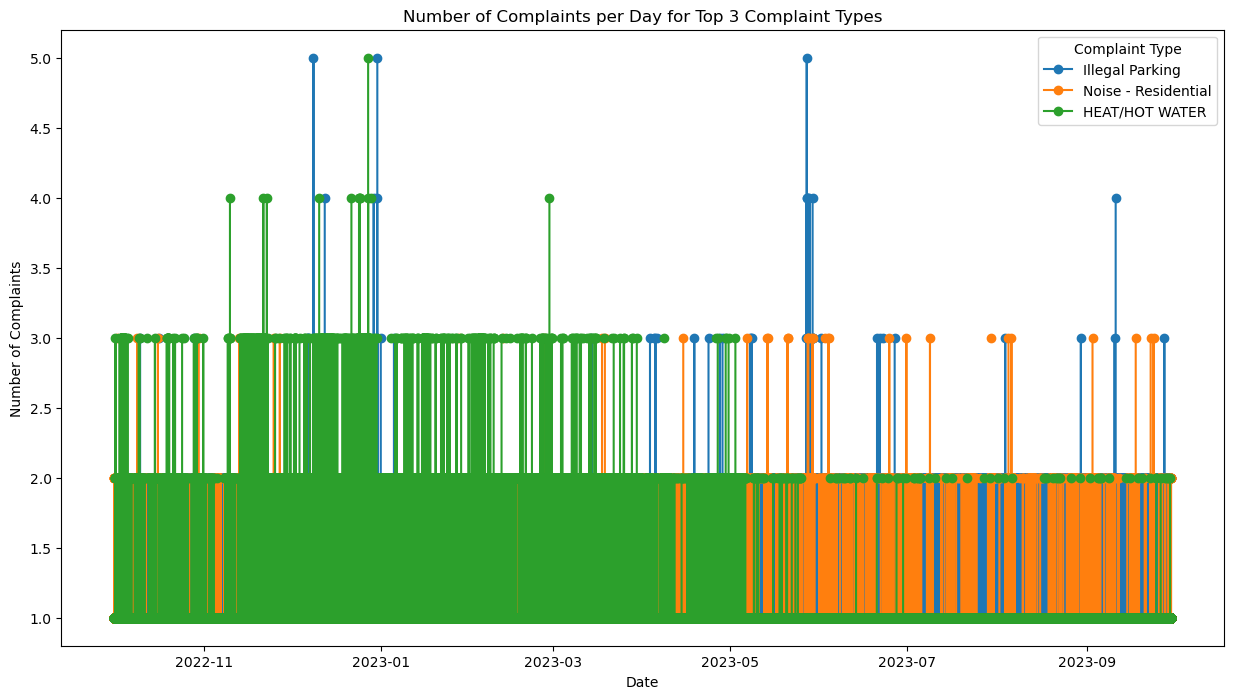

In [59]:
def visualize_top_complaints(df):
    """
    Visualize the number of complaints per day for the top 3 complaint types.

    Parameters:
        df (pandas.DataFrame): DataFrame containing 'date' and 'complaint_type' columns.
    """
    # Filter data for the specified date range
    start_date = '2022-10-01'
    end_date = '2023-09-30'
    mask = (df['date'] >= start_date) & (df['date'] <= end_date)
    filtered_df = df.loc[mask]

    # Find top 3 complaint types
    top_complaints = filtered_df['complaint_type'].value_counts().head(3)
    top_complaint_types = top_complaints.index.tolist()

    # Filter data for top 3 complaint types
    top_complaints_df = filtered_df[filtered_df['complaint_type'].isin(top_complaint_types)]

    # Group by date and complaint type, count occurrences
    complaints_per_day = top_complaints_df.groupby(['date', 'complaint_type']).size().unstack()

    # Plotting
    plt.figure(figsize=(15, 8))
    for complaint_type in top_complaint_types:
        plt.plot(complaints_per_day.index, complaints_per_day[complaint_type], label=complaint_type, marker='o', linestyle='-')

    plt.title('Number of Complaints per Day for Top 3 Complaint Types')
    plt.xlabel('Date')
    plt.ylabel('Number of Complaints')
    plt.legend(title='Complaint Type')
    plt.show()

# Assuming you have a DataFrame named 'your_dataframe' with columns 'date' and 'complaint_type'
visualize_top_complaints(data_311)

### Visualization 2

<Figure size 2000x1000 with 0 Axes>

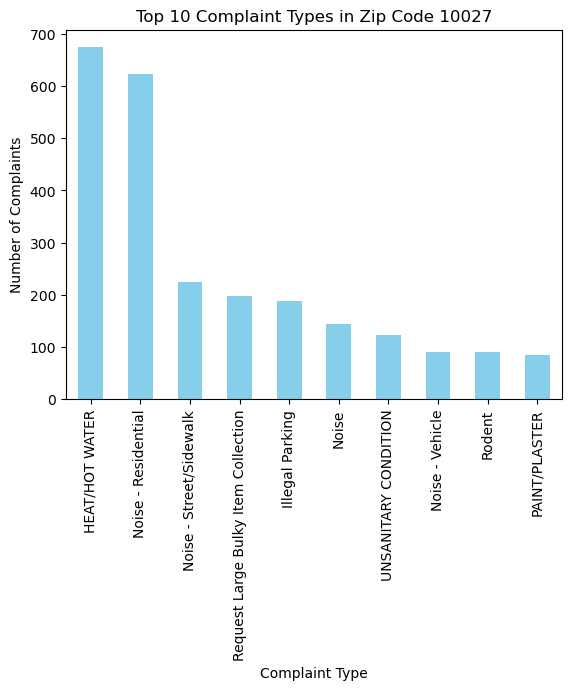

In [60]:
def get_top_complaints_by_zipcode(engine, start_date, end_date, zipcode, top_n=10):
    """
    Retrieve the top N complaint types and their counts for a specific ZIP code within a date range.

    Parameters:
        engine (sqlalchemy.engine.Engine): SQLAlchemy engine for database connection.
        start_date (str): Start date of the date range.
        end_date (str): End date of the date range.
        zipcode (str): ZIP code for filtering.
        top_n (int, optional): Number of top complaint types to retrieve. Defaults to 10.

    Returns:
        pandas.DataFrame: DataFrame containing complaint types and their counts.
    """
    query = f"""
    SELECT 
        complaint_type,
        COUNT(*) AS complaint_count
    FROM nyc_311
    WHERE date BETWEEN '{start_date}' AND '{end_date}'
        AND zipcode = '{zipcode}'
    GROUP BY complaint_type
    ORDER BY complaint_count DESC
    LIMIT {top_n};
    """

    # Execute SQL query and fetch results into a Pandas DataFrame
    df = pd.read_sql(query, engine)

    return df

def plot_complaints_by_type(df):
    """
    Plot the number of complaints by complaint type.

    Parameters:
        df (pandas.DataFrame): DataFrame containing complaint types and their counts.
    """
    # Plotting
    plt.figure(figsize=(20, 10))
    df.plot(kind='bar', x='complaint_type', y='complaint_count', color='skyblue', legend=False)
    plt.title('Top 10 Complaint Types in Zip Code 10027')
    plt.xlabel('Complaint Type')
    plt.ylabel('Number of Complaints')
    plt.show()

# Define the time frame and zip code
start_date = '2018-10-01'
end_date = '2023-09-30'
zipcode = '10027'

# Call the functions
df_top_complaints_zipcode = get_top_complaints_by_zipcode(engine, start_date, end_date, zipcode)
plot_complaints_by_type(df_top_complaints_zipcode)

### Visualization 3

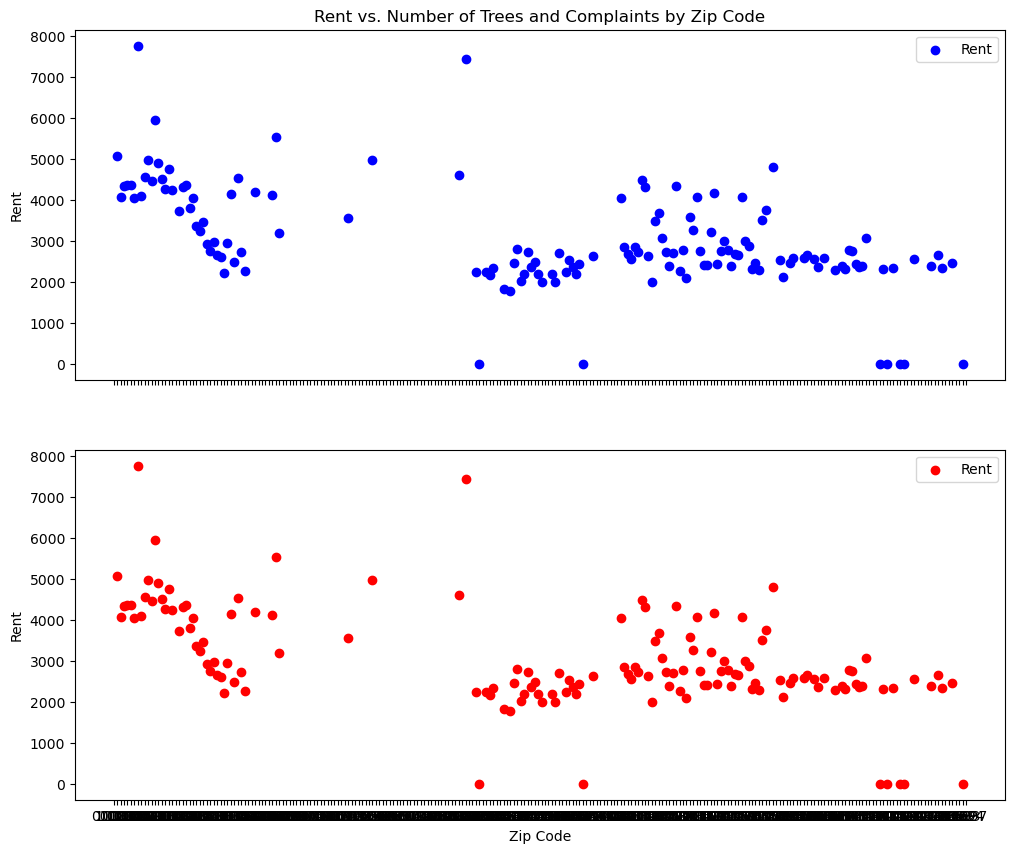

In [61]:
def get_data_for_correlation(engine, start_date, end_date):
    # Query to get data for rent, trees, and complaints
    query = f"""
    SELECT
    zipcodes.zipcode,
    zillow."2023-08-31" AS rent,
    COUNT(*) AS num_trees,
    COUNT(*) AS num_complaints
    FROM
        zipcodes
    LEFT JOIN
        nyc_tree ON zipcodes.zipcode = nyc_tree.zipcode
    LEFT JOIN
        nyc_311 ON zipcodes.zipcode = nyc_311.zipcode AND nyc_311.date BETWEEN '2015-01-01' AND '2023-09-30'
    LEFT JOIN
        zillow ON zipcodes.zipcode = zillow.zipcode
    GROUP BY
        zipcodes.zipcode, zillow."2023-08-31"
    ORDER BY
        zipcodes.zipcode;
    """

    # Execute SQL query and fetch results into a Pandas DataFrame
    df = pd.read_sql(query, engine)

    return df

def plot_correlation(data):
    # Create subplots with shared x-axis
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # Plot rent vs. number of trees
    ax1.scatter(data['zipcode'], data['rent'], c='blue', label='Rent')
    ax1.set_ylabel('Rent')
    ax1.set_title('Rent vs. Number of Trees and Complaints by Zip Code')
    ax1.legend()

    # Plot rent vs. number of complaints
    ax2.scatter(data['zipcode'], data['rent'], c='red', label='Rent')
    ax2.set_xlabel('Zip Code')
    ax2.set_ylabel('Rent')
    ax2.legend()

    plt.show()

# Define the time frame
start_date = '2015-01-01'
end_date = '2023-09-30'

# Call the functions
df_correlation_data = get_data_for_correlation(engine, start_date, end_date)
plot_correlation(df_correlation_data)

### Visualization 4

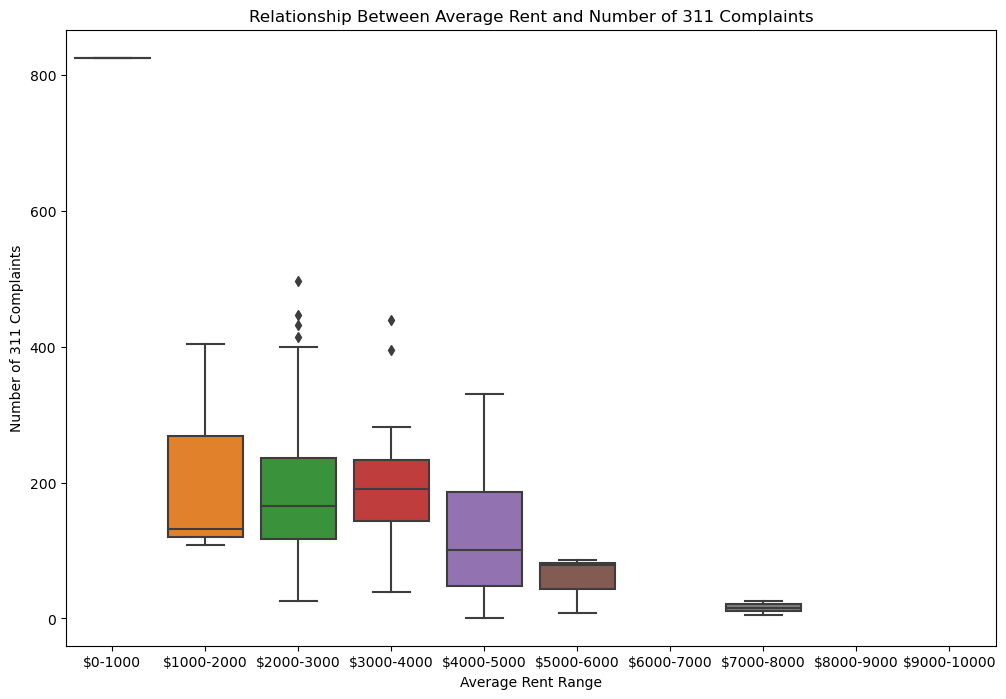

In [62]:
def get_data_for_boxplot(engine, start_date, end_date):
    """
    Retrieve data for a boxplot showing the relationship between average rent
    and the number of 311 complaints.

    Parameters:
    - engine: SQLAlchemy engine for database connection
    - start_date (str): Start date for data retrieval
    - end_date (str): End date for data retrieval

    Returns:
    - pandas.DataFrame: DataFrame containing the data
    """
    # Query to get data for average rent and number of complaints
    query = f"""
    SELECT
        zillow."2023-08-31" AS rent,
        COUNT(*) AS num_complaints
    FROM
        zipcodes 
    LEFT JOIN nyc_311 c ON zipcodes.zipcode = c.zipcode
        AND c.date BETWEEN '{start_date}' AND '{end_date}'
        
    LEFT JOIN
        zillow ON zipcodes.zipcode = zillow.zipcode
    GROUP BY zillow."2023-08-31"
    ORDER BY rent;
    """

    # Execute SQL query and fetch results into a Pandas DataFrame
    df = pd.read_sql(query, engine)

    return df

def plot_boxplot(data):
    """
    Create a boxplot showing the relationship between average rent and the number of 311 complaints.

    Parameters:
    - data (pandas.DataFrame): DataFrame containing the data for plotting
    """
    # Create bins for average rent
    bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
    labels = [f"${i}-{i+1000}" for i in range(0, 10000, 1000)]
    
    # Bin the data based on average rent
    data['rent_bin'] = pd.cut(data['rent'], bins=bins, labels=labels, right=False)

    # Create a boxplot
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='rent_bin', y='num_complaints', data=data)
    plt.title('Relationship Between Average Rent and Number of 311 Complaints')
    plt.xlabel('Average Rent Range')
    plt.ylabel('Number of 311 Complaints')
    plt.show()

# Define the time frame
start_date = '2022-10-01'
end_date = '2023-09-30'

# Call the functions
df_boxplot_data = get_data_for_boxplot(engine, start_date, end_date)
plot_boxplot(df_boxplot_data)

### Visualization 5

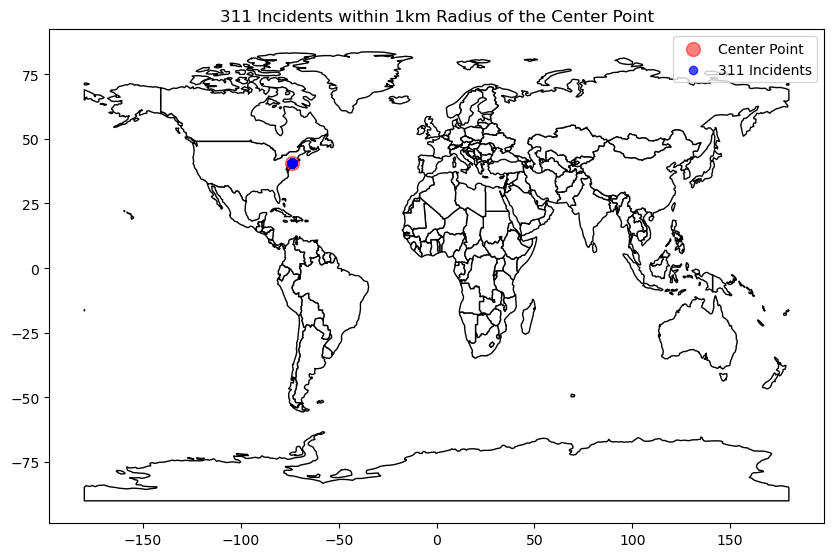

In [64]:
def get_311_incidents_within_radius(engine, center_latitude, center_longitude, radius, start_date, end_date):
    """
    Retrieve 311 incidents within a specified radius and time frame.

    Parameters:
    - engine: SQLAlchemy engine
    - center_latitude: Latitude of the center point
    - center_longitude: Longitude of the center point
    - radius: Radius in kilometers
    - start_date: Start date of the time frame
    - end_date: End date of the time frame

    Returns:
    - GeoDataFrame containing 311 incidents
    """

    # Query to get 311 incidents within the specified radius and time frame
    query = f"""
    SELECT
        latitude,
        longitude,
        ST_SetSRID(ST_MakePoint(longitude, latitude), 4326) AS geometry
    FROM
        nyc_311
    WHERE
        date BETWEEN '{start_date}' AND '{end_date}'
        AND ST_DWithin(
            ST_MakePoint(longitude, latitude)::geography,
            ST_MakePoint({center_longitude}, {center_latitude})::geography,
            {radius} * 1000
        );
    """
    # Execute SQL query and fetch results into a GeoDataFrame
    gdf = gpd.read_postgis(query, engine, geom_col='geometry')

    return gdf

def plot_311_incidents(gdf, center_latitude, center_longitude):
    """
    Plot 311 incidents on a map.

    Parameters:
    - gdf: GeoDataFrame containing 311 incidents
    - center_latitude: Latitude of the center point
    - center_longitude: Longitude of the center point
    """
    
    # Create a GeoDataFrame for the center point
    center_point = gpd.GeoDataFrame({'geometry': [Point(center_longitude, center_latitude)]}, geometry='geometry', crs='EPSG:4326')

    # Create a base map
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    base = world.plot(figsize=(10, 10), color='white', edgecolor='black')

    # Plot the center point
    center_point.plot(ax=base, color='red', marker='o', markersize=100, alpha=0.5)

    # Plot the 311 incidents
    gdf.plot(ax=base, color='blue', marker='o', alpha=0.7, label='311 Incidents')

    # Add legend and title
    plt.legend(['Center Point', '311 Incidents'])
    plt.title('311 Incidents within 1km Radius of the Center Point')

    # Show the plot
    plt.show()

# Define the center coordinates and radius
center_latitude = 40.80737875669467
center_longitude = -73.96253174434912
radius = 1  # in kilometers

# Define the time frame
start_date = '2023-01-01'
end_date = '2023-09-30'

# Call the functions
gdf_311_incidents = get_311_incidents_within_radius(engine, center_latitude, center_longitude, radius, start_date, end_date)
plot_311_incidents(gdf_311_incidents, center_latitude, center_longitude)

### Visualization 6

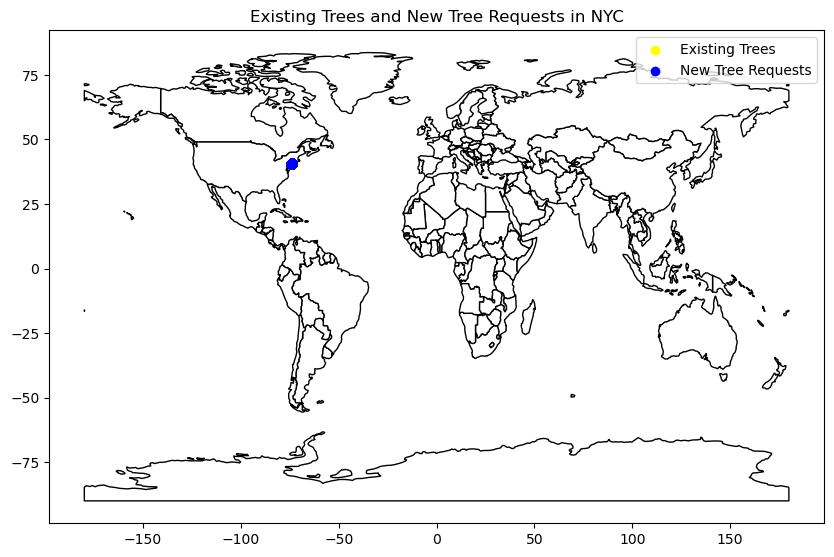

In [66]:
def get_tree_and_311_data(engine, start_date, end_date):
    """
    Retrieve coordinates of existing trees and "New Tree Request" 311 complaints.

    Parameters:
    - engine: SQLAlchemy engine
    - start_date: Start date of the time frame
    - end_date: End date of the time frame

    Returns:
    - Tuple of GeoDataFrames (gdf_trees, gdf_311_complaints)
    """

    # Query to get coordinates of existing trees
    tree_query = f"""
    SELECT
        id,
        latitude,
        longitude,
        ST_SetSRID(ST_MakePoint(longitude, latitude), 4326) AS geometry
    FROM
        nyc_tree;
    """

    # Query to get coordinates of "New Tree Request" 311 complaints
    complaint_query = f"""
    SELECT
        latitude,
        longitude,
        ST_SetSRID(ST_MakePoint(longitude, latitude), 4326) AS geometry
    FROM
        nyc_311
    WHERE
        date BETWEEN '{start_date}' AND '{end_date}'
        AND complaint_type = 'New Tree Request';
    """

    # Execute SQL queries and fetch results into GeoDataFrames
    gdf_trees = gpd.read_postgis(tree_query, engine, geom_col='geometry')
    gdf_311_complaints = gpd.read_postgis(complaint_query, engine, geom_col='geometry')

    return gdf_trees, gdf_311_complaints

def plot_trees_and_311(gdf_trees, gdf_311_complaints):
    """
    Plot the coordinates of existing trees and "New Tree Request" 311 complaints on a map.

    Parameters:
    - gdf_trees: GeoDataFrame containing coordinates of existing trees
    - gdf_311_complaints: GeoDataFrame containing coordinates of "New Tree Request" 311 complaints
    """
    
    # Create a base map
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    base = world.plot(figsize=(10, 10), color='white', edgecolor='black')

    # Plot the coordinates of existing trees
    gdf_trees.plot(ax=base, color='yellow', marker='o', label='Existing Trees')

    # Plot the coordinates of "New Tree Request" 311 complaints
    gdf_311_complaints.plot(ax=base, color='blue', marker='o', label='New Tree Requests')

    # Add legend and title
    plt.legend()
    plt.title('Existing Trees and New Tree Requests in NYC')

    # Show the plot
    plt.show()

# Define the time frame
start_date = '2018-10-01'
end_date = '2023-09-30'

# Call the functions
gdf_existing_trees, gdf_new_tree_requests = get_tree_and_311_data(engine, start_date, end_date)
plot_trees_and_311(gdf_existing_trees, gdf_new_tree_requests)